<h1><center>Predict cancer mortality rates for US counties - EDA</center><h1>
    
# 1. <a id='Introduction'>Introduction 🃏 </a>
    
###  1.1 What is Cancer Mortality Rates?
* Cancer mortality is the number of deaths due to cancer occurring in a specified population over a given period of time (typically 1 year).

###  1.2 What is OLS Regression Challenge?
- In this competition, you will build a multivariate Ordinary Least Squares regression model to predict Cancer Mortality Rates for US countries.

# 2. <a id='importing'>Importing the necessary libraries📗</a> 

In [1]:
import pandas as pd 
import numpy as np  
from data_ingest import IngestData 

# 3. <a id='reading'>Reading the train.csv 📚</a>

In [2]:
data = pd.read_csv('ols-regression-challenge-data/data/cancer_reg.csv') 
data.head() 

#### 
# ingest_data = IngestData() 
# data = ingest_data.ingest_data('ols-regression-challenge-data/data/cancer_reg.csv') 

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# 4. <a id='basic'>Basic Data Exploration 🏕️</a> 

In [3]:
print(data.info()) 
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### Missing values

In [6]:
null_values = data.isnull().sum()
print(null_values[null_values > 0]) 

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


### Analyzing Variables

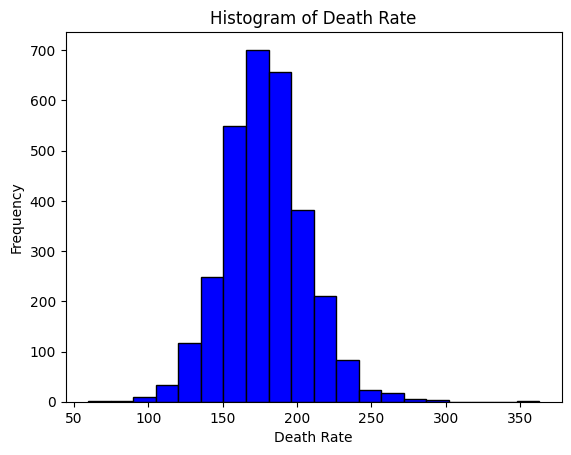

In [185]:
import matplotlib.pyplot as plt

plt.hist(data['target_deathrate'], bins = 20, color = 'blue', edgecolor = 'black')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Death Rate')
plt.show()

#### Interpretation of Histogram 

- The values are grouped into bins along the x-axis. The height of the bar indicates how many values of the data set fall into that bin.  
- In this histogram, it shows all of the death rates where in x-axis is the death rate divided in bins and y-axis is the number of counties in that bin. 
- 0-100 is the first bin which includes death between 0-100, 100-200 is the second bin which includes death between 100-200 and so on. 

With the help of this, we will be able to answer following questions:- 

- Where is the center of the data?
- What is the spread of the data? What is the range?
- What is the shape of the data? For example, is it symmetric, skewed, uniform, or bimodal?

**To Note:-** 

- A number line (typically the x-axis) spans from the minimum value to the maximum value for one numeric variable of the data set.

- This number line is broken into equally sized intervals, called bins, covering the range of values in the data. 

- A histogram shows how frequently a value falls into a particular bin.

- The height of each bar represents the number of values in the data set that fall within a particular bin. 

- When the y-axis is labeled as "count" or "number", the numbers along the y-axis tend to be discrete positive integers. The height of each bar represents the amount of data points that fall within each bin.

- A histogram makes it easy to see which values are most common and which values are least common in a data set.

Look at :- https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1#:~:text=A%20histogram%20shows%20how%20frequently,to%20be%20discrete%20positive%20integers. 

**Observations:-** 

- Slightly Positively Skewed Data 
- There are outliers as well (be careful) 
- Normal Distributed Data
- Mean is greater than median (slightly positively skewed data)
- There are 3 peaks in the data (bimodal data) 

In [186]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=data['target_deathrate'], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Death Rate',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()


#### Interpretation of Boxplot 

- The boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


Mean of avgAnnCount:  606.3385437820807
Standard deviation of avgAnnCount:  1416.3562232267052


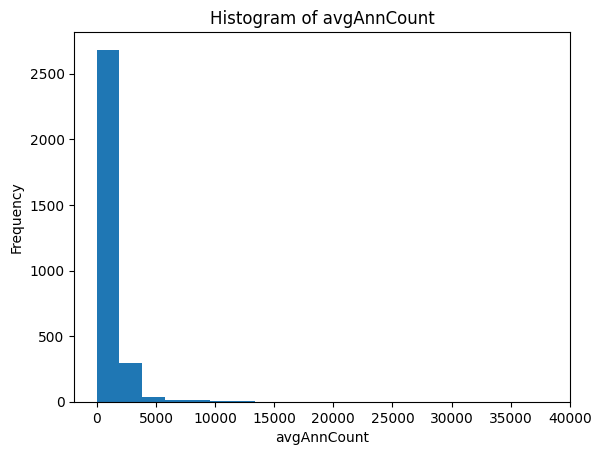

Correlation between avgAnnCount and TARGET_deathRate:  -0.1435316196886881


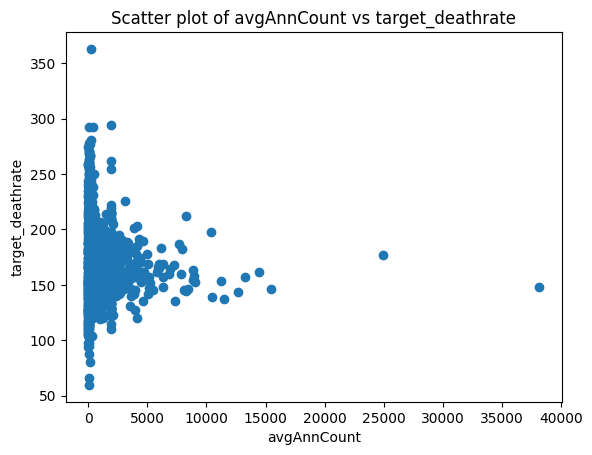

In [187]:

# Analyzing avgAnnCount column 
avg_ann_count_mean = data["avganncount"].mean()
avg_ann_count_std = data["avganncount"].std()
print("Mean of avgAnnCount: ", avg_ann_count_mean)
print("Standard deviation of avgAnnCount: ", avg_ann_count_std)

# create a histogram to visualize the distribution of avgAnnCount
plt.hist(data["avganncount"], bins=20)
plt.xlabel("avgAnnCount")
plt.ylabel("Frequency")
plt.title("Histogram of avgAnnCount")
plt.show()

fig = go.Figure(data=[go.Box(y=data['avganncount'], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
fig.update_layout(
    title='Boxplot of Avgnncount',
    yaxis_title='Death Rate',
    width=700,
    height=500)
fig.show()

# calculate the correlation between avgAnnCount and TARGET_deathRate
corr = data["avganncount"].corr(data["target_deathrate"])
print("Correlation between avgAnnCount and TARGET_deathRate: ", corr)

# create a scatter plot to visualize the relationship between avgAnnCount and TARGET_deathRate
plt.scatter(data["avganncount"], data["target_deathrate"])
plt.xlabel("avgAnnCount")
plt.ylabel("target_deathrate")
plt.title("Scatter plot of avgAnnCount vs target_deathrate")
plt.show()



### Interpreting the visualizations 

- Mean: The mean of avgAnnCount is 606.34, which tells us that on average, there were 606 cases of cancer diagnosed annually per county in the dataset.

- Standard deviation: The standard deviation of avgAnnCount is 1416.36, which tells us how spread out the data is. In this case, it indicates that the data is quite spread out, with some counties having relatively low numbers of cancer diagnoses annually and some having relatively high numbers. This is further confirmed by the histogram or boxplot that shows the distribution of avgAnnCount.

- Correlation: The correlation between avgAnnCount and TARGET_deathRate is -0.14, which tells us the strength and direction of the linear relationship between the two variables. A correlation value ranges between -1 and 1. A correlation of -1 means that there is a perfect negative linear relationship between the two variables, which means that as one variable increases, the other variable decreases. A correlation of 1 means that there is a perfect positive linear relationship between the two variables, which means that as one variable increases, the other variable also increases. A correlation of 0 means that there is no linear relationship between the two variables.


#### Dealing with Missing Values

In [188]:
missing_values = data.isnull().sum() 
print(missing_values[missing_values > 0])

pctsomecol18_24            2285
pctemployed16_over          152
pctprivatecoveragealone     609
dtype: int64


### D’Agostino and Pearson’s Test To Identify Normally Distributed Data & Outlier Detection

 https://medium.datadriveninvestor.com/how-would-i-know-if-my-variable-distribution-is-gaussian-c3b215383469

In [189]:
processed_data = pd.read_csv('ols-regression-challenge-data/cancer_reg_processed.csv') 
processed_data.head()
print(processed_data.shape)

(3047, 1904)


In [190]:
from scipy.stats import normaltest

numerical_columns = processed_data.select_dtypes(include=np.number).columns 
gaussian_cols = []  
non_gaussian_cols = []
for col in numerical_columns:
    stat, p = normaltest(processed_data[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        gaussian_cols.append(col) 
    else: 
        non_gaussian_cols.append(col)
print(gaussian_cols) 

Statistics=5028.465, p=0.000
Statistics=5314.434, p=0.000
Statistics=127.363, p=0.000
Statistics=943.641, p=0.000
Statistics=854.431, p=0.000
Statistics=5801.694, p=0.000
Statistics=408.566, p=0.000
Statistics=4449.679, p=0.000
Statistics=4715.992, p=0.000
Statistics=42.880, p=0.000
Statistics=48.305, p=0.000
Statistics=2293.395, p=0.000
Statistics=236.299, p=0.000
Statistics=508.655, p=0.000
Statistics=39.668, p=0.000
Statistics=1395.030, p=0.000
Statistics=55.596, p=0.000
Statistics=536.946, p=0.000
Statistics=87.619, p=0.000
Statistics=471.048, p=0.000
Statistics=73.543, p=0.000
Statistics=9.139, p=0.010
Statistics=20.036, p=0.000
Statistics=1.039, p=0.595
Statistics=114.894, p=0.000
Statistics=933.419, p=0.000
Statistics=1377.835, p=0.000
Statistics=4033.108, p=0.000
Statistics=3071.494, p=0.000
Statistics=218.834, p=0.000
Statistics=893.748, p=0.000
Statistics=55.722, p=0.000
Statistics=1290.293, p=0.000
Statistics=847.167, p=0.000
Statistics=10017.746, p=0.000
Statistics=10017.74

In [191]:
len(gaussian_cols)

1

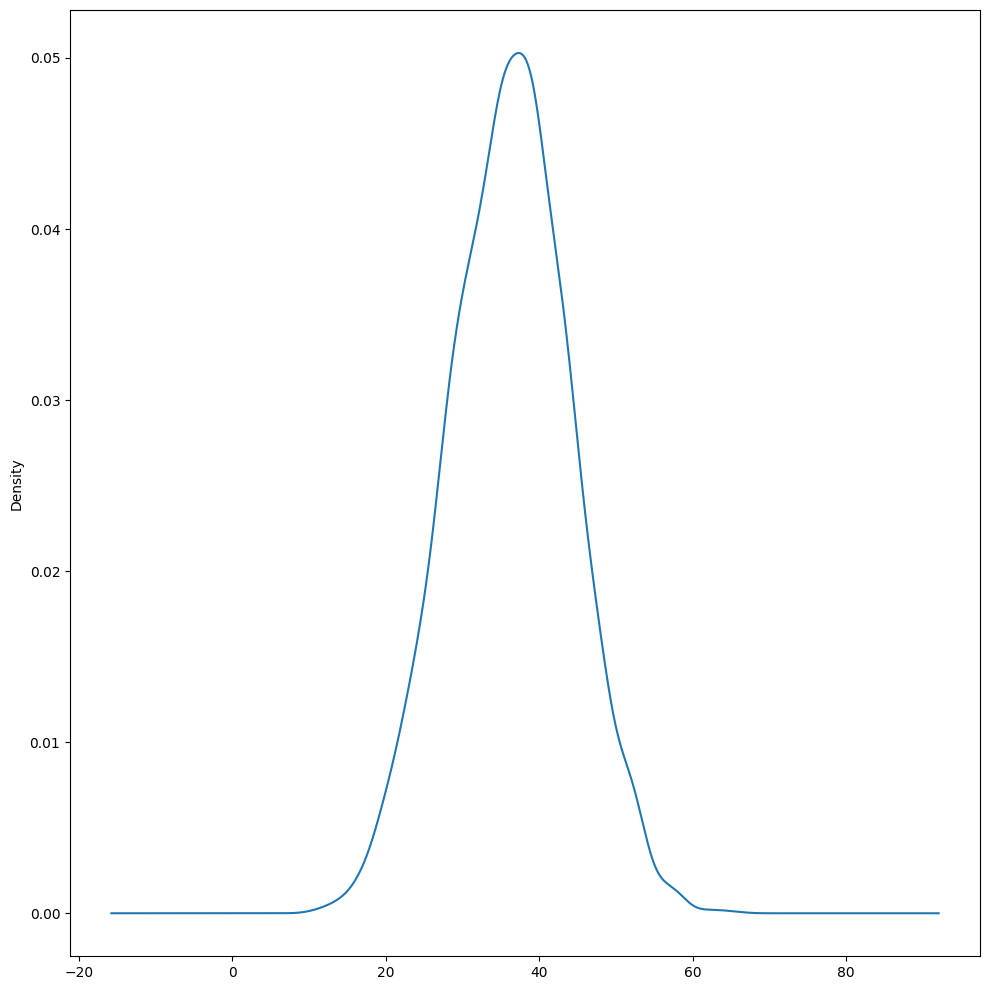

In [192]:
# make subplots for all gaussian cols as density plots 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))  
for i, col in enumerate(gaussian_cols):
    processed_data[col].plot(kind='density', ax=axes, subplots=True, sharex=False)
plt.tight_layout()
plt.show()


In [193]:
gaussian_data = processed_data[gaussian_cols]
basic_info_gaussian = gaussian_data.describe()

In [194]:
# take the mean, std, min, max for every gaussian column 
basic_info_gaussian = basic_info_gaussian.loc[['mean', 'std', 'min', 'max']]  
basic_info_gaussian

,pctpubliccoverage
mean,36.252642
std,7.841741
min,11.200000
max,65.100000


In [195]:
# dealing with outlier values for incidencerate column
print("Highest allowed",basic_info_gaussian["pctpubliccoverage"]["mean"] + 3*basic_info_gaussian['pctpubliccoverage']["std"])
print("Lowest allowed",basic_info_gaussian["pctpubliccoverage"]["mean"] - 3*basic_info_gaussian['pctpubliccoverage']["std"])

processed_data[(processed_data['pctpubliccoverage'] > 59.777864755203105) | (processed_data['pctpubliccoverage'] < 12.727419130586192)]

Highest allowed 59.777864755203105
Lowest allowed 12.727419130586192


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
176,25.0,10,134.3,359.0,27627,4596,24.2,0.000000,42.6,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
209,862.0,283,136.5,364.9,122641,375629,3.9,449.912014,35.3,34.9,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1486,1067.0,358,142.9,444.5,51907,118891,10.9,84.110656,65.3,64.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2713,8.0,3,203.3,201.3,68387,5702,9.9,0.000000,36.8,38.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2740,129.0,54,126.1,332.0,32533,20152,22.8,0.000000,54.8,54.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
def deal_with_outliers(df, col, basic_info):
    highest_allowed = basic_info[col]["mean"] + 3*basic_info[col]["std"] 
    lowest_allowed = basic_info[col]["mean"] - 3*basic_info[col]["std"]
    df = df[(df[col] > highest_allowed) | (df[col] < lowest_allowed)]  
    return df 
cols_have_outliers = []
for col in gaussian_cols:
    df = deal_with_outliers(gaussian_data, col, basic_info_gaussian)
    shape = df.shape
    if shape[0] > 0:
        cols_have_outliers.append(col)
print(cols_have_outliers)

['pctpubliccoverage']


In [197]:
# trimming 
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"] 
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    trimmed_data = processed_data[(processed_data[col] < highest_allowed) & (processed_data[col] > lowest_allowed)]
trimmed_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
# capping 
for col in cols_have_outliers:
    highest_allowed = basic_info_gaussian[col]["mean"] + 3*basic_info_gaussian[col]["std"] 
    lowest_allowed = basic_info_gaussian[col]["mean"] - 3*basic_info_gaussian[col]["std"]
    capped_data = processed_data.copy()
    capped_data.loc[capped_data[col] > highest_allowed, col] = highest_allowed
    capped_data.loc[capped_data[col] < lowest_allowed, col] = lowest_allowed
capped_data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### To Identify Skewness 

In [179]:
# remove columns which are categorical and have less than 10 unique values 
cols_to_remove = []
for col in processed_data.columns:
    if processed_data[col].nunique() < 10:
        cols_to_remove.append(col) 
print(len(cols_to_remove))
data_for_skewness = processed_data.drop(cols_to_remove, axis=1)

1870


In [200]:
def identify_skewed_cols(df, cols):
    skewed_cols = []
    for col in cols:
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            skewed_cols.append(col)
    return skewed_cols

skewed_cols = identify_skewed_cols(data_for_skewness, data_for_skewness.columns) 
len(skewed_cols)

16

In [203]:
skewed_data = data_for_skewness[skewed_cols]

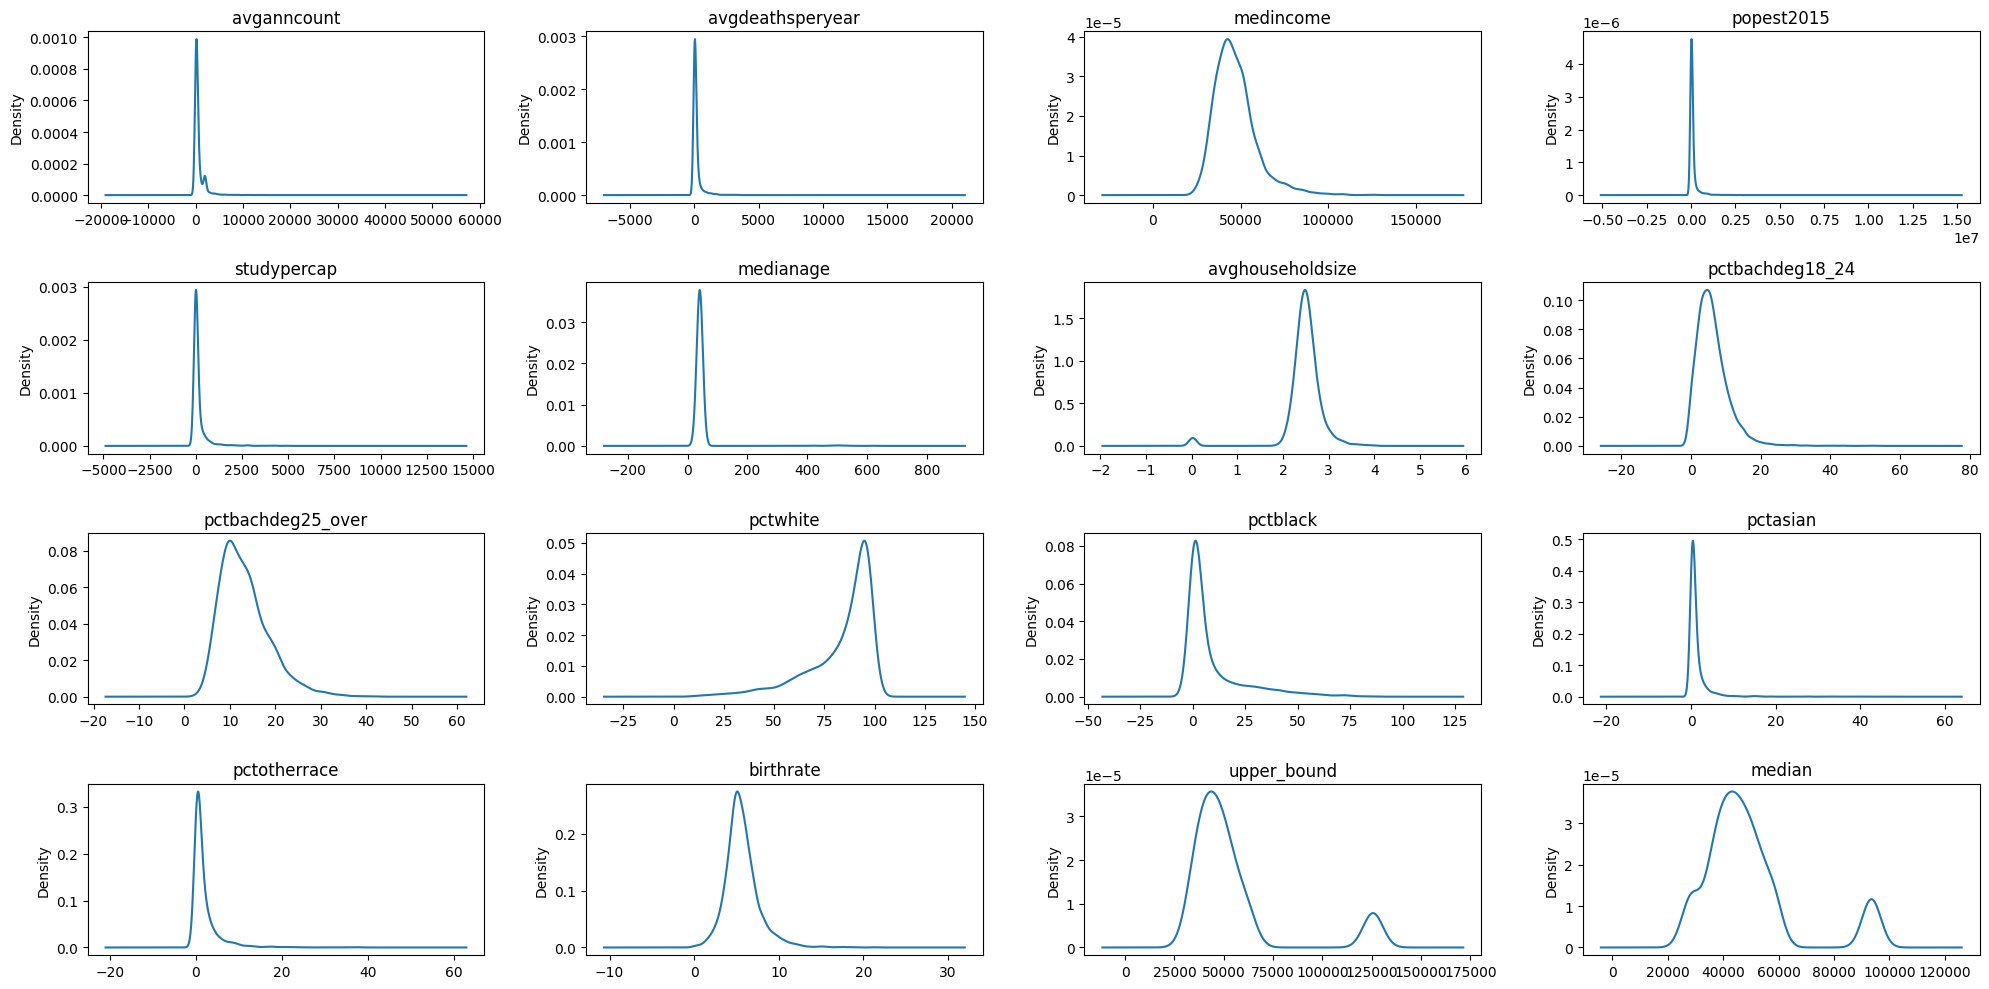

In [213]:
# plot the distribution of the skewed columns which is around 8 columns 
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
for i, col in enumerate(skewed_cols): 
    # plot title 
    axes[i//4, i%4].set_title(col)
    skewed_data[col].plot(kind='density', ax=axes[i//4, i%4], subplots=True, sharex=False)
plt.tight_layout()
plt.show()




In [215]:
def box_plot(df, col):
    fig = go.Figure(data=[go.Box(y=df[col], boxpoints='outliers', jitter=0.3, pointpos=-1.8)])
    fig.update_layout(
        title='Boxplot of ' + col,
        yaxis_title=col,
        width=500,
        height=500)
    fig.show()

for col in skewed_cols:
    box_plot(processed_data, col)

In [216]:
# checking outlier values for studypercap column
percentile25 = processed_data['studypercap'].quantile(0.25)
percentile75 = processed_data['studypercap'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit)]

Upper limit 209.1269406875
Lower limit -125.4761644125


,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,state_ South Dakota,state_ Tennessee,state_ Texas,state_ Utah,state_ Vermont,state_ Virginia,state_ Washington,state_ West Virginia,state_ Wisconsin,state_ Wyoming
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,4025.000000,1380,177.8,510.900000,60397,843954,13.1,427.748432,35.8,34.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,740.000000,269,172.7,499.300000,51395,121846,15.7,837.122269,41.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,1962.667684,138,153.7,453.549422,49246,118053,19.4,660.720185,28.8,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3039,1962.667684,9,208.3,453.549422,49256,2968,10.5,673.854447,45.2,45.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3041,1962.667684,48,146.4,453.549422,49508,29029,13.0,723.414516,32.2,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
def deal_with_outlier_with_iqr(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    outliers = df[(df[col] > upper_limit) | (df[col] < lower_limit)]
    return outliers
cols_have_outliers_skewed = []
for col in skewed_cols:
    outliers = deal_with_outlier_with_iqr(processed_data, col)
    shape = outliers.shape
    if shape[0] > 0:
        cols_have_outliers_skewed.append(col)
print(cols_have_outliers_skewed)    

['avganncount', 'avgdeathsperyear', 'medincome', 'popest2015', 'studypercap', 'medianage', 'avghouseholdsize', 'pctbachdeg18_24', 'pctbachdeg25_over', 'pctwhite', 'pctblack', 'pctasian', 'pctotherrace', 'birthrate', 'upper_bound', 'median']


#### Trimming 

In [222]:
# find how many values whch are greater than upper limit  and lower than lower limit 
rows_to_remove = processed_data[(processed_data['studypercap'] > upper_limit) | (processed_data['studypercap'] < lower_limit)] 
# trim the data
trimmed_data = processed_data[(processed_data['studypercap'] < upper_limit) & (processed_data['studypercap'] > lower_limit)] 
trimmed_data.shape

(2543, 1904)

#### Capping 

In [224]:
# cap the data
capped_data = processed_data.copy()
capped_data.loc[capped_data['studypercap'] > upper_limit, 'studypercap'] = upper_limit
capped_data.loc[capped_data['studypercap'] < lower_limit, 'studypercap'] = lower_limit
capped_data.shape

(3047, 1904)

In [227]:
def capping(df, col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df.loc[df[col] > upper_limit, col] = upper_limit
    df.loc[df[col] < lower_limit, col] = lower_limit
    return df 

for col in cols_have_outliers_skewed:
    capped_data = capping(processed_data, col)
capped_data.shape

(3047, 1904)

In [229]:
# box plot of the capped data
for col in cols_have_outliers_skewed:
    box_plot(capped_data, col)
    

#### Assignment -> Outlier Detection Using Percentil Method 

In [230]:
# save the capped data
capped_data.to_csv('ols-regression-challenge-data/capped_data.csv', index=False)